# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisbon, Oporto or Other (Nominal)
 

### Relevant Papers:

* Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

* Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# EDA

#### The relation between MILK and GROCERY spending, colored by Channel column

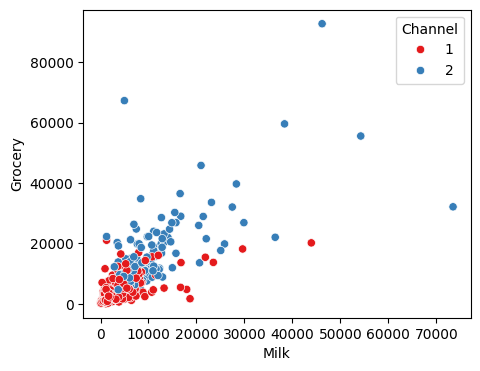

In [5]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='Set1');

#### The histogram of MILK spending, colored by Channel

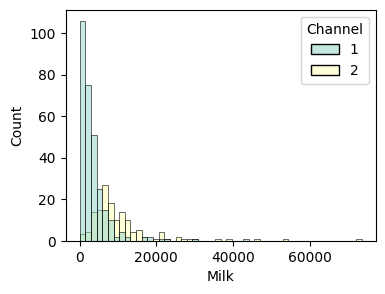

In [10]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set3');

**We want to stack the channels, instead of having them overlap**

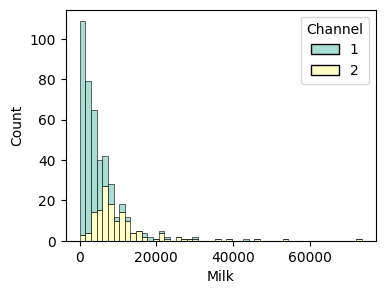

In [11]:
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set3', multiple='stack');

### The Clustermap of Spending

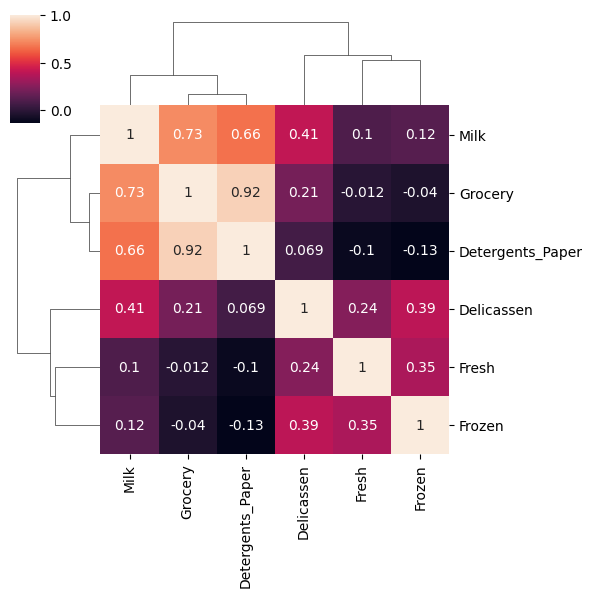

In [17]:
correlation = df.drop(['Channel', 'Region'], axis=1).corr()

sns.clustermap(data=correlation, annot=True, figsize=(6,6));

## PairPlot of the dataframe, colored by Region

In [ ]:
sns.pairplot(data=df, hue='Region', palette='Set3');

## DBSCAN

## Scaling The Dataset

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(df)

In [22]:
X_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## Finding The Best Epsilon

**We use DBSCAN and a for loop to create a variety of models testing different epsilon values. The min_samples are equal to 2 times the number of features.**

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
per_outliers = []

for eps in np.linspace(0.001, 3, 50):

    model = DBSCAN(eps=eps)
    model.fit(X_scaled)

    N=len(model.labels_)
    
    outliers = np.sum(model.labels_ == -1)
    
    per_outliers.append( 100*outliers / N )

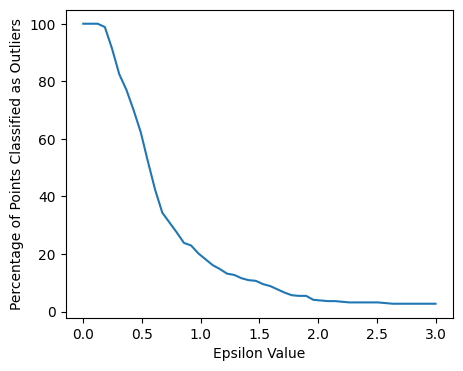

In [28]:
plt.figure(figsize=(5,4))
sns.lineplot(x=np.linspace(0.001, 3, 50), y=per_outliers)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value"); 

## DBSCAN with Chosen Epsilon (eps = 2)

In [29]:
model = DBSCAN(eps = 2)

In [30]:
model.fit(X_scaled)

DBSCAN(eps=2)

#### Milk vs Grocery, colored by the discovered labels of the DBSCAN model

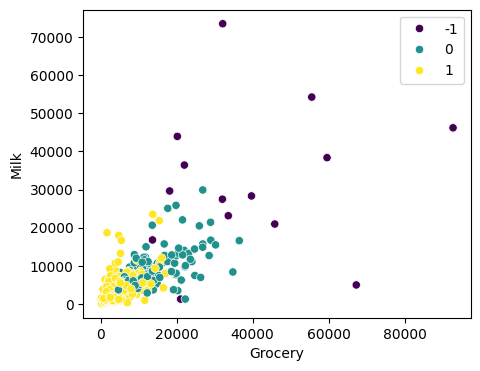

In [34]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y='Milk', x='Grocery', hue=model.labels_, palette='viridis');

#### Milk vs. Detergents Paper colored by the labels

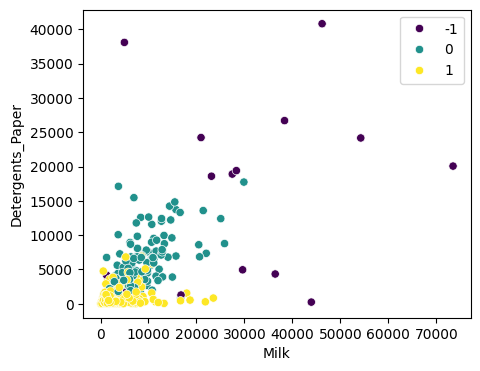

In [36]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue=model.labels_, palette='viridis');

#### A new column on the original dataframe called "Labels"

In [37]:
df['Labels'] = model.labels_

In [38]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


#### **The statistical mean of the clusters and outliers for the spending amounts on the categories**

In [54]:
categories_means = df.drop(['Channel', 'Region'], axis=1).groupby('Labels').mean()

In [55]:
categories_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


#### Normalization of the dataframe (categories_means) using MinMaxScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
cat_means_scaled = scaler.fit_transform(categories_means)

In [59]:
cat_means_scaled

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.23929169, 0.34101071, 0.        , 0.38075797,
        0.05993767],
       [0.20318831, 0.        , 0.        , 0.1567934 , 0.        ,
        0.        ]])

In [60]:
cat_means_scaled= pd.DataFrame(data=cat_means_scaled, index=categories_means.index, columns=categories_means.columns)

In [61]:
cat_means_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


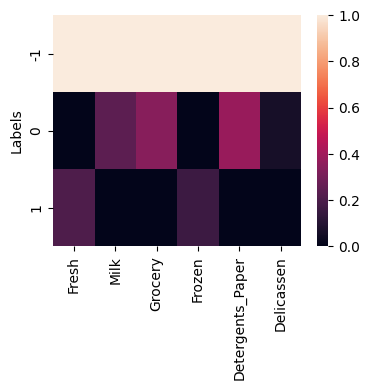

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(data=cat_means_scaled);

### Heatmap with the outliers removed

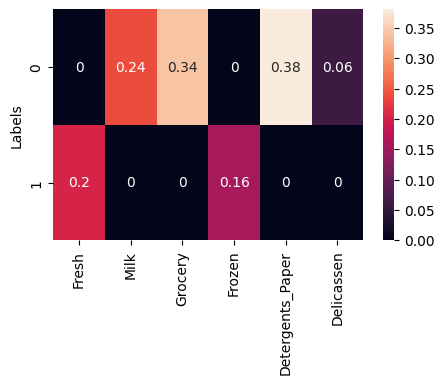

In [69]:
plt.figure(figsize=(5,3))
sns.heatmap(data=cat_means_scaled.iloc[1:], annot=True);

## In which spending category did the two clusters' modes differ greatly?

**It is evident that in the Detergent Paper category, the difference between the two clusters is greater than in other categories.**